# Day 10 - Exercise 3

In [7]:
import pandas as pd

import matplotlib.pyplot as plt


#-------------------- Import <Titles> Data-Set --------------------#

titles = pd.read_csv('titles.csv')

print('\n#---------- Titles Data-Set Glimpse ----------#')

titles.head()


#---------- Titles Data-Set Glimpse ----------#


,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008


In [2]:
#-------------------- Import <Cast> Data-Set --------------------#

cast = pd.read_csv('cast.csv')

print('\n#---------- Cast Data-Set Glimpse ----------#')

cast.head(10)


#---------- Cast Data-Set Glimpse ----------#


,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


# 1. Using groupby(), plot the number of films that have been released each decade in the history of cinema. 

In [3]:
cast['decade'] = (cast['year'] // 10) * 10

films_decade = cast.groupby('decade')['title'].count()

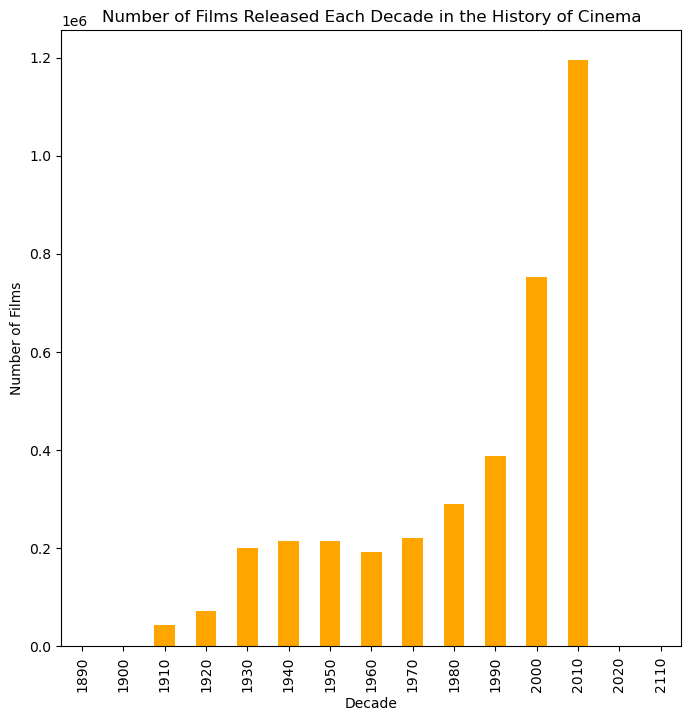

In [9]:
plt.figure(figsize=(8, 8))

films_decade.plot(kind='bar', color='orange')

plt.title('Number of Films Released Each Decade in the History of Cinema')

plt.xlabel('Decade')

plt.ylabel('Number of Films')

plt.show()

# 2. Use groupby() to plot the number of "Hamlet" films made each decade. 

In [10]:
hamlet_films = titles[titles['title'] == 'Hamlet']

hamlet_films['decade'] = (hamlet_films['year'] // 10) * 10

hamlet_decade = hamlet_films.groupby('decade')['title'].count()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16444\3594648006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hamlet_films['decade'] = (hamlet_films['year'] // 10) * 10


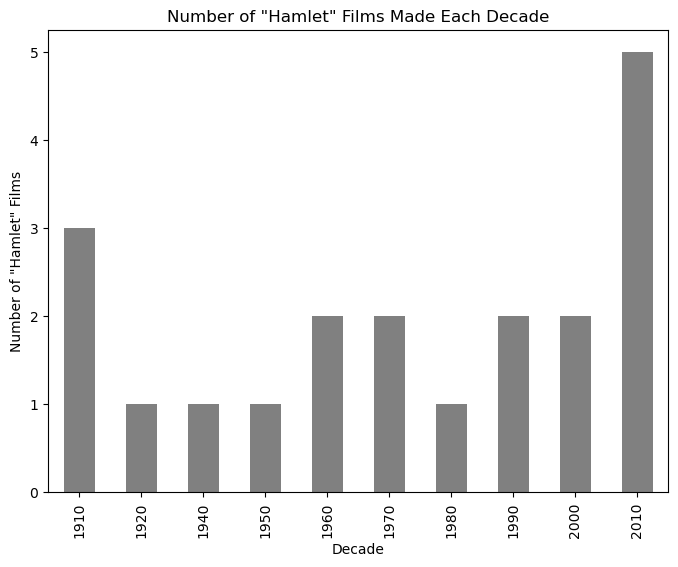

In [13]:
plt.figure(figsize=(8, 6))

hamlet_decade.plot(kind='bar', color='gray')

plt.title('Number of "Hamlet" Films Made Each Decade')

plt.xlabel('Decade')

plt.ylabel('Number of "Hamlet" Films')

plt.show()

# 3. How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s? 

In [14]:
leading_roles_1950s = cast[(cast['n'] == 1) & (cast['year'].between(1950, 1959))]

#-------------------- Pivot Tables --------------------#

leading_roles_by_1950s = leading_roles_1950s.pivot_table(index='year', 
                                                         columns='type', 
                                                         values='title', 
                                                         aggfunc='count', 
                                                         fill_value=0)

In [15]:
print("\n No. of leading roles (n=1) available to actors and actresses in each year of the 1950s are:\n")

print(leading_roles_by_1950s)


 No. of leading roles (n=1) available to actors and actresses in each year of the 1950s are:

type  actor  actress
year                
1950    625      288
1951    651      285
1952    613      304
1953    664      312
1954    636      316
1955    648      285
1956    668      307
1957    739      315
1958    715      301
1959    733      327


# 4. In the 1950s decade taken as a whole. how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5? 

In [19]:
roles_1950s = cast[(cast['n'].between(1, 5)) & (cast['year'].between(1950, 1959))]


#-------------------- Pivot Tables --------------------#


n_roles = roles_1950s.pivot_table(index='n', 
                                     columns='type', 
                                     values='title', 
                                     aggfunc='count', 
                                     fill_value=0)

In [20]:
print("\n Total No. of roles available to actors and actresses in the 1950s are: \n")

print(n_roles)


 Total No. of roles available to actors and actresses in the 1950s are: 

type  actor  actress
n                   
1.0    6692     3040
2.0    4640     4635
3.0    5654     3201
4.0    5663     2881
5.0    5674     2592


# 5. Use groupby() to determine how many roles are listed for each of the Pink Panther movies. 

In [25]:
panther_roles = cast[cast['title'].str.contains('Pink Panther', case=False)]


#-------------------- Group by Movie Title --------------------#


total_roles_per_movie = panther_roles.groupby('title')['character'].count().reset_index()

In [26]:
print("\n No. of roles listed for each 'Pink Panther' movie are: \n")

print(total_roles_per_movie)


 No. of roles listed for each 'Pink Panther' movie are: 

                            title  character
0       Curse of the Pink Panther         67
1     Revenge of the Pink Panther         68
2         Son of the Pink Panther         46
3                The Pink Panther        111
4              The Pink Panther 2         84
5  The Pink Panther Strikes Again         70
6  The Return of the Pink Panther         30
7       Trail of the Pink Panther         41


# 6. List. in order by year, each of the films in which Frank Oz has played more than 1 role. 

In [27]:
frank_roles = cast[cast['name'] == 'Frank Oz']


#-------------------- Group by Movie Title --------------------#


roles_per_movie = frank_roles.groupby(['title', 'year'])['character'].count().reset_index()


#-------------------- Character Played More Than 1 --------------------#


movies_with_multiple_roles = roles_per_movie[roles_per_movie['character'] > 1]

In [32]:
print("\n Total Films in which 'Frank Oz' has played more than one role are: \n")

print(movies_with_multiple_roles)


 Total Films in which 'Frank Oz' has played more than one role are: 

                                   title  year  character
0         An American Werewolf in London  1981          2
2                       Follow That Bird  1985          3
7                 Muppet Treasure Island  1996          4
8                     Muppets from Space  1999          4
18  The Adventures of Elmo in Grouchland  1999          3
20                      The Dark Crystal  1982          2
22                The Great Muppet Caper  1981          6
23            The Muppet Christmas Carol  1992          7
24                      The Muppet Movie  1979          8
25            The Muppets Take Manhattan  1984          7


# 7. List each of the characters that Frank Oz has portrayed at least twice. 

In [30]:
frank_role = cast[cast['name'] == 'Frank Oz']


#-------------------- Group by Movie Title --------------------#


character_counts = frank_role['character'].value_counts()


#-------------------- Character Played More Than 1 --------------------#


played_twice = character_counts[character_counts >= 2]

In [33]:
print("\n Total Characters portrayed by 'Frank Oz' at least twice are: \n")

print(played_twice)


 Total Characters portrayed by 'Frank Oz' at least twice are: 

Miss Piggy        6
Yoda              6
Animal            6
Cookie Monster    5
Sam the Eagle     5
Fozzie Bear       4
Bert              3
Grover            2
Name: character, dtype: int64
